<a href="https://colab.research.google.com/github/rpizarrog/probabilidad-y-estad-stica/blob/master/2024/Caso_16_Probabilidad_de_una_distribuci%C3%B3n_de_variables_aleatorias_continuas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probabilidad de distribuciones continuas

La densidad de densidad (*pdf probability density function*) es una rerpesentación visual de la función matemática que denota la densidad de una distribución de datos de variables continuas.

Una función acumulada de probabilidad (*CDF Cumultive Distribution Function*) es una función que proporciona la probabilidad acumulada de que una variable aleatoria sea menor o igual a un intervalo específico. Se denota como:

Toda la probabilidad acumulada o área bajo la curva es 1 en términos relativos o 100% en términos porcentuales.

$$
F(x)=∫_{-∞}^{+∞}f(x)dx
$$

Para calcular la probabilidad de in intervalo en donde $a$ es el valor mímino y $b$ el valor máximo de un intervalo en donde x debe ser parte del intervalo y la funcion de densidad definida por $f(x)= ...$

El intervalo se define como:
$$
a \le x \le b;
$$

$$
\text {x forma parte de la función de densidad }f(x)
$$

Para calcular el área bajo la curva del intervalo:
$$
F(x)=∫_a^bf(x)dx
$$


donde  $f(x)$  es la densidad (PDF).

En otras palabras para calcular la probabilidd de una variable aleatoria continua que está inmersa en una función de densidad $f(x)$ se necesita calcular el área bajo la curva definida por un intervalo por debajo de la curva.

# Objetivo

Calcular probabilidades de distribuciones continuas por medio de de funcionse integrate() integral de un intervalo.



# Desarrollo

## Cargar librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

import sympy as sp

from scipy.stats import norm
import scipy.integrate as spi



## Cargar funciones



In [ ]:
# Densidad normal
def f_x_normal(x, media, desviacion_estandar):
  # Calcular la PDF de la variable aleatoria continua
  fx = 1 / (desviacion_estandar * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desviacion_estandar**2))
  return fx

# Función para visualizar la densidad de probabilidad de una distribución normal
def f_visualizar_dens_normal(valores, media, desviacion_estandar):
    # Crear un rango de valores para la PDF
    x = np.linspace(media - 3 * desviacion_estandar, media + 3 * desviacion_estandar, 1000)

    # Calcular la PDF de la distribución normal
    pdf = 1 / (desviacion_estandar * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desviacion_estandar**2))

    # Visualizar la PDF
    plt.plot(x, pdf, label='PDF: Normal({},{})'.format(media, desviacion_estandar))
    plt.title('Función de Densidad de Probabilidad (PDF) - Distribución Normal')
    plt.xlabel('Valor de x')
    plt.ylabel('Densidad de Probabilidad')
    plt.legend()
    # plt.grid(True)
    plt.show()

def f_visualizar_dens_area_normal(valores, media, desviacion_estandar, a, b, prob=0):
    # Crear un rango de valores para la PDF
    x = np.linspace(media - 3 * desviacion_estandar, media + 3 * desviacion_estandar, 1000)

    # Calcular la PDF de la distribución normal
    pdf = 1 / (desviacion_estandar * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desviacion_estandar**2))

    # Visualizar la PDF
    plt.plot(x, pdf, label='PDF: Normal({},{})'.format(media, desviacion_estandar))
    if prob == 0:
      plt.fill_between(x, 0, pdf, where=(x >= a) & (x <= b), alpha=0.3, color='red', label='Área bajo la curva')
    else:
      plt.fill_between(x, 0, pdf, where=(x >= a) & (x <= b), alpha=0.3, color='red', label='Área '+str(np.round(prob * 100, 2))+"%")

    plt.title('Función de Densidad de Probabilidad (PDF) - Distribución Normal')
    plt.xlabel('Valor de x')
    plt.ylabel('Densidad de Probabilidad')
    plt.legend()
    # plt.grid(True)
    plt.show()

## Densidad de calificaciones de alumnos

Se genera una muestra $n=100$ de variables aletorias que representan promedios de calificaciones de alumnos alrededor de una media de $80$, $\mu=80$ y una desviación estándar de $5$, $S=5$.





 Las calificaciones de alumnos. x = calificaciones de alumnos
[73.03662043 88.92273277 83.37462136 78.37003026 74.10670863 73.3614127
 79.7167403  75.56422389 85.68729121 79.55964075 84.01060517 83.67283515
 79.27237853 80.44369228 85.45751369 83.86506146 77.80447777 82.44196499
 81.7668613  83.30692845 86.29782206 85.23272914 78.49454666 83.04642377
 68.05604015 74.95819987 71.10320796 83.61239987 78.9569197  68.79649488
 81.03699656 81.31666533 91.6204059  81.52398727 75.8154504  75.06044036
 76.27607366 81.34769427 72.91987104 80.31434197 80.04504911 83.53123263
 85.3863228  79.67339162 72.36819444 79.57443674 79.53023888 76.33123725
 79.32062795 77.75827331 75.66035478 74.43275164 79.12587224 73.05736423
 74.81685834 79.40669413 79.71411834 91.76903031 83.43891614 78.44379735
 77.02720655 74.72465093 76.80010216 86.11357324 84.49085003 82.29870505
 76.73896132 81.68936208 73.49498702 76.85127675 78.76301843 78.93922715
 84.84449468 81.35938673 80.53427378 70.98243008 80.77710184 8

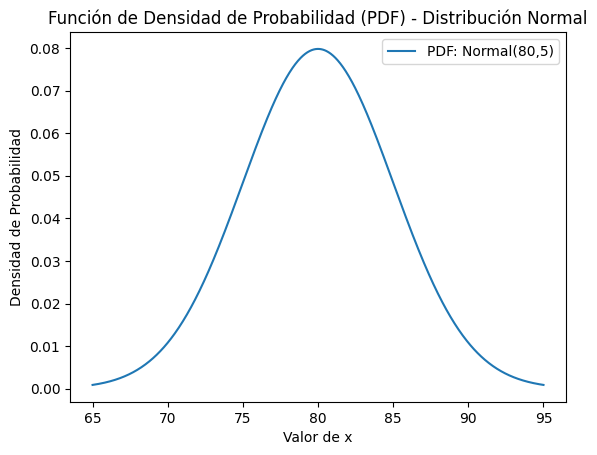

In [ ]:
# Parámetros de la distribución normal
n = 100
media = 80
desviacion_estandar = 5
# Generando calificaciones de alumnos
print ("\n Las calificaciones de alumnos. x = calificaciones de alumnos")

# Generar valores aleatorios de una distribución normal
x = norm.rvs(loc = media, scale = desviacion_estandar, size = n)

# Imprimir los valores aleatorios generados
print(x)

# Mandar llamar la función que visualiza únicamente la densidad de una normal
f_visualizar_dens_normal(x, media, desviacion_estandar)

## ¿Cuál es la probabilidad de encontrar a un alumno que tenga promedio entre 75 y 85?. $F(75 \le x \le 85)$


### Visualizando área bajo la curva de la probabilidad

$$
F(75 \le x \le 85)
$$

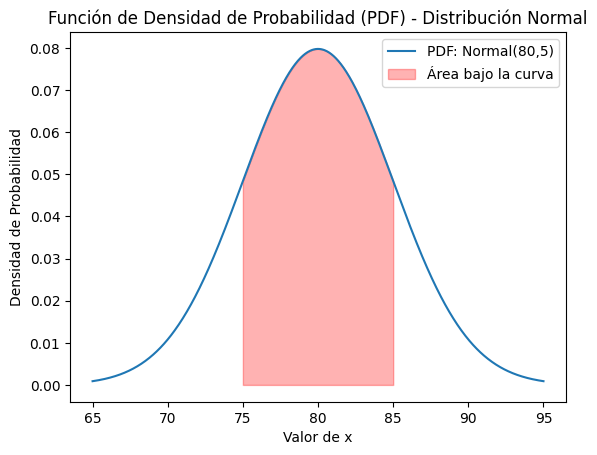

In [ ]:
# Límites del intervalo
a = limite_inferior = 75  # a mínimo
b = limite_superior = 85  # b máximo

f_visualizar_dens_area_normal(x, media, desviacion_estandar, a, b)

### Usando integrales definidas

Mandando llamar la función sp.integrate() que resuelve integrales definidas


$$
f(x) =\frac{1}{\sigma \cdot \sqrt{2 \cdot \pi}}\cdot e
^{\frac{-1}{2}\cdot ( \frac {x - \mu}{\sigma}) ^2}
$$

$$
F(x)=∫_a^bf(x)dx \therefore
$$

$$
F(x)=∫_{75}^{85} \frac{1}{\sigma \cdot \sqrt{2 \cdot \pi}}\cdot e
^{\frac{-1}{2}\cdot ( \frac {x - \mu}{\sigma}) ^2} dx \therefore
$$



In [ ]:
# Definir símbolos
x, a, b = sp.symbols('x a b')

# Definir la función de densidad de probabilidad con los valores numéricos
# La función es la misma que la que se definió al inicio: f_x_normal()
y = 1 / (desviacion_estandar * sp.sqrt(2 * sp.pi)) * sp.exp(-(x - media)**2 / (2 * desviacion_estandar**2))

# Realizar la integral definida
resultado = sp.integrate(y, (x, a, b))

# Sustituir los valores numéricos en el resultado
resultado = resultado.subs({a: 75, b: 85})

print(f"El área bajo la curva en el intervalo [75, 85] es: {np.round(float(resultado.evalf()), 4)} o {np.round(float(resultado.evalf()) * 100, 4)}%")


El área bajo la curva en el intervalo [75, 85] es: 0.6827 o 68.2689%


### Usando la función *spi.quad()* para calcular la probabilidad $
F(75≤x≤85) $

La función *quad()* realiza la integración numérica de la PDF en el intervalo especificado y devuelve el área bajo la curva.

El resultado, area bajo la curva, representa la probabilidad de que una variable aleatoria normal caiga en ese intervalo o rango entre $ \text{a y b}$.


El área bajo la curva en el intervalo [75, 85] es: 0.6827 o 68.2689%


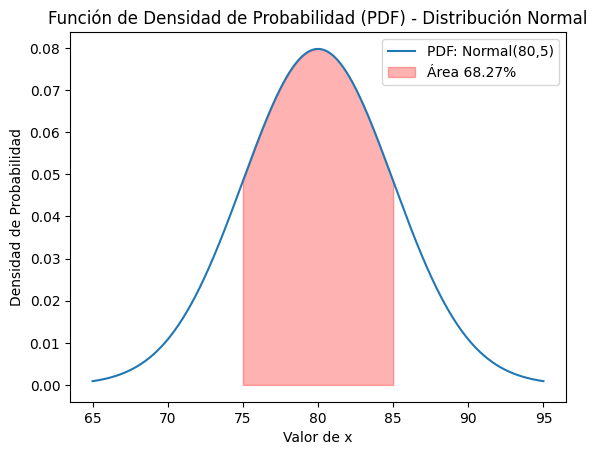

In [ ]:
# Función de densidad de probabilidad (PDF) de la distribución normal
pdf = norm.pdf

# Calcular el área bajo la curva en el intervalo [75, 85]
probabilidad, _ = spi.quad(pdf, limite_inferior, limite_superior, args=(media, desviacion_estandar))

# probabilidad, _ = spi.quad(pdf, a, b, args=(media, desviacion_estandar))

print(f"El área bajo la curva en el intervalo [{a}, {b}] es: {np.round(probabilidad, 4)} o {np.round(probabilidad * 100, 4)}%")

f_visualizar_dens_area_normal(x, media, desviacion_estandar, a, b, probabilidad)


# Interpretación

¿Cómo determinar la probabilidad de una distribución continua?

Encontrar el área bajo la curva de la densidad o la probabilidad de que x esté entre 80 y 85 de la última curva presentada.




